## Import Library Dasar Yang Diperlukan

In [4]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Untuk Plot 3D
# Agar plot tampil rapi
plt.rcParams['figure.figsize'] = (8, 6)

## Load Dataset Breast Cancer

In [8]:
# Load Dataset Breast Cancer
cancer = load_breast_cancer()

df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']

# Menampilan 5 Baris Pertama Dari Dataset
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Eksplorasi Awal Dataset Breast Cancer

In [9]:
# Informasi Umum Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
# Statistik Dataset Deskriptif
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [11]:
# Cek missing Value
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [12]:
# Cek Data Duplikat
df.duplicated().sum()

np.int64(0)

In [13]:
# Distribusi Kelas Target
print("Nama kelas:", cancer.target_names)
df['target'].value_counts()

Nama kelas: ['malignant' 'benign']


,count
target,
1,357
0,212


## Pemisahan Fitur dan Label

In [14]:
# Fitur dan Label
X = df[cancer.feature_names].values
y = df['target'].values

print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (569, 30)
Shape y: (569,)


## Pembagian Data Latih dan Data Uji (Train-Test Split)

In [15]:
# Train-test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)

Shape X_train: (455, 30)
Shape X_test: (114, 30)


## Standardisasi Data (Mean = 0, Std = 1)

In [17]:
# Standardisasi (Mean=0, std=1)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)    # Fit + Transform pada data train
X_test_scaled = scaler.transform(X_test)          # hanya transform pada dataset

X_train_scaled[:5]

array([[-1.07200079e+00, -6.58424598e-01, -1.08808010e+00,
        -9.39273639e-01, -1.35939882e-01, -1.00871795e+00,
        -9.68358632e-01, -1.10203235e+00,  2.81062120e-01,
        -1.13231479e-01, -7.04860874e-01, -4.40938351e-01,
        -7.43948977e-01, -6.29804931e-01,  7.48061001e-04,
        -9.91572979e-01, -6.93759567e-01, -9.83284458e-01,
        -5.91579010e-01, -4.28972052e-01, -1.03409427e+00,
        -6.23497432e-01, -1.07077336e+00, -8.76534437e-01,
        -1.69982346e-01, -1.03883630e+00, -1.07899452e+00,
        -1.35052668e+00, -3.52658049e-01, -5.41380026e-01],
       [ 1.74874285e+00,  6.65017334e-02,  1.75115682e+00,
         1.74555856e+00,  1.27446827e+00,  8.42288215e-01,
         1.51985232e+00,  1.99466430e+00, -2.93045055e-01,
        -3.20179716e-01,  1.27567198e-01, -3.81382677e-01,
         9.40746962e-02,  3.17524379e-01,  6.39656015e-01,
         8.73892616e-02,  7.08450758e-01,  1.18215034e+00,
         4.26212305e-01,  7.47970186e-02,  1.22834212e+

## Penerapan Model SVM tanpa PCA (Baseline Model)

In [18]:
# Model SVM tanpa PCA
svm_no_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_no_pca.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi
y_pred_no_pca = svm_no_pca.predict(X_test_scaled)

acc_no_pca = accuracy_score(y_test, y_pred_no_pca)
print("Akurasi SVM tanpa PCA:", acc_no_pca)

print("\nClassification Report (Tanpa PCA):")
print(classification_report(y_test, y_pred_no_pca, target_names=cancer.target_names))

Akurasi SVM tanpa PCA: 0.9824561403508771

Classification Report (Tanpa PCA):
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Penerapan PCA (Principal Component Analysis)

In [19]:
# PCA dengan 3 komponen utama
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Shape X_train_pca:", X_train_pca.shape)
print("Shape X_test_pca:", X_test_pca.shape)


Shape X_train_pca: (455, 3)
Shape X_test_pca: (114, 3)


## Menampilkan Variansi yang Dijelaskan oleh Setiap Komponen PCA

In [20]:
# Variansi yang dijelaskan oleh setiap komponen
explained_var = pca.explained_variance_ratio_
print("Explained Variance Ratio tiap komponen:", explained_var)
print("Total Explained Variance yang dijelaskan 3 komponen pertama:", sum(explained_var))

Explained Variance Ratio tiap komponen: [0.44413492 0.18944618 0.09543356]
Total Explained Variance yang dijelaskan 3 komponen pertama: 0.7290146639367365


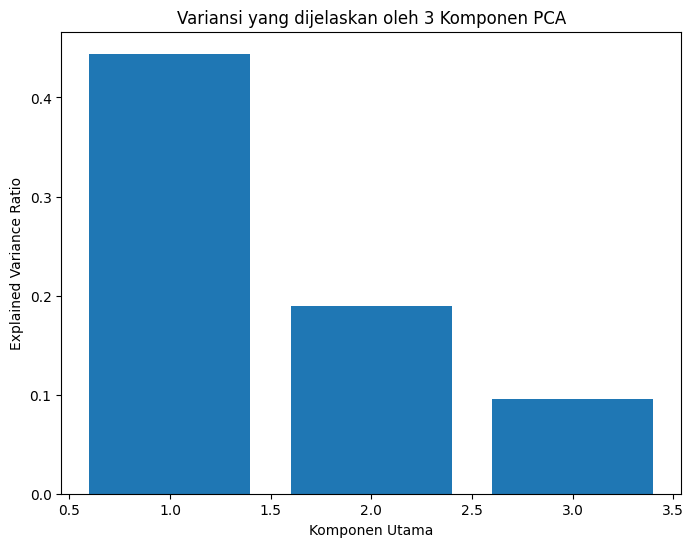

In [21]:
plt.bar([1, 2, 3], explained_var)
plt.xlabel("Komponen Utama")
plt.ylabel("Explained Variance Ratio")
plt.title("Variansi yang dijelaskan oleh 3 Komponen PCA")
plt.show()

## Membangun Model SVM dengan PCA

In [22]:
# Model SVM dengan PCA
svm_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)

# Prediksi dan Evaluasi
y_pred_pca = svm_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)
print("Akurasi SVM dengan PCA (3 Komponen):", acc_pca)

print("\nClassification Report (Dengan PCA):")
print(classification_report(y_test, y_pred_pca, target_names=cancer.target_names))

Akurasi SVM dengan PCA (3 Komponen): 0.9473684210526315

Classification Report (Dengan PCA):
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        42
      benign       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## Visualisasi PCA dalam Ruang 3 Dimensi

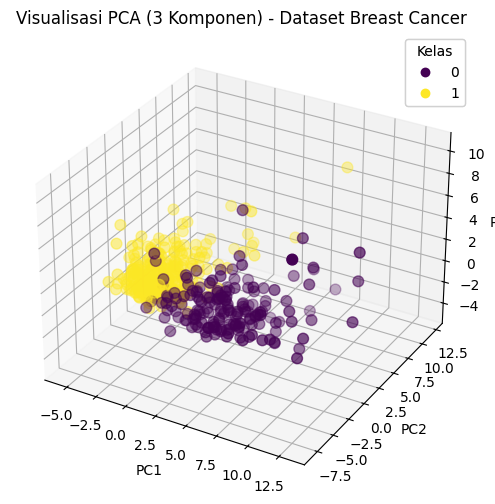

In [23]:
# Visualisasi 3D PCA (Menggunakan Data Train)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    X_train_pca[:, 2],
    c=y_train,
    s=60
)

ax.set_title('Visualisasi PCA (3 Komponen) - Dataset Breast Cancer')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Tambahkan legend berdasarkan kelas
legend = ax.legend(
    *scatter.legend_elements(),
    title="Kelas"
)

ax.add_artist(legend)

plt.show()

## Perbandingan Model SVM tanpa PCA dan dengan PCA

In [24]:
# Membandingkan hasil model tanpa dan dengan PCA
comparison = pd.DataFrame({
    'Model': ['SVM tanpa PCA', 'SVM dengan PCA (3 Komponen)'],
    'Akurasi': [acc_no_pca, acc_pca],
    'Variansi Total PCA': [None, sum(explained_var)]
})

print(comparison)

                         Model   Akurasi  Variansi Total PCA
0                SVM tanpa PCA  0.982456                 NaN
1  SVM dengan PCA (3 Komponen)  0.947368            0.729015


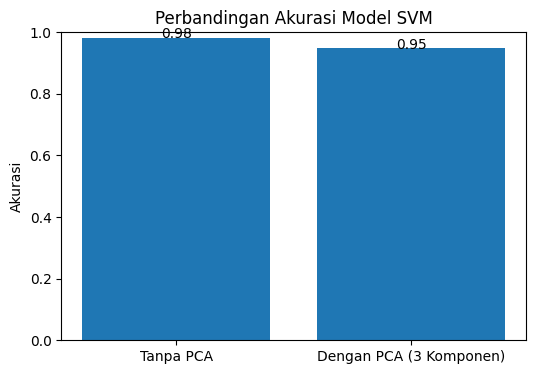

In [25]:
plt.figure(figsize=(6, 4))
plt.bar(['Tanpa PCA', 'Dengan PCA (3 Komponen)'], [acc_no_pca, acc_pca])
plt.title('Perbandingan Akurasi Model SVM')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
for i, v in enumerate([acc_no_pca, acc_pca]):
  plt.text(i, v, f'{v:.2f}', ha='center')
plt.show()